In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, wget, gc
warnings.filterwarnings('ignore')

In [61]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


In [62]:
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py", out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_, remove_digits, remove_special_characters, removeStopWords, remove_links, punct, email_address, lower, non_ascii


100% [.......................................................] 13881 / 13881

In [63]:

df = pd.read_csv("Symptom2Disease.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)


In [64]:
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [65]:
df.shape

(1200, 2)

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None


In [67]:
print(df.describe())

            label                                               text
count        1200                                               1200
unique         24                                               1153
top     Psoriasis  I've been feeling extremely scratchy, sick, an...
freq           50                                                  4


In [68]:
print(df.isna().sum())

label    0
text     0
dtype: int64


In [69]:
print(df.duplicated().sum())

47


In [70]:
df['num_words'] = df.text.apply(len)
print(df.num_words.describe())

count    1200.000000
mean      171.876667
std        35.481506
min        60.000000
25%       147.750000
50%       170.000000
75%       193.000000
max       317.000000
Name: num_words, dtype: float64


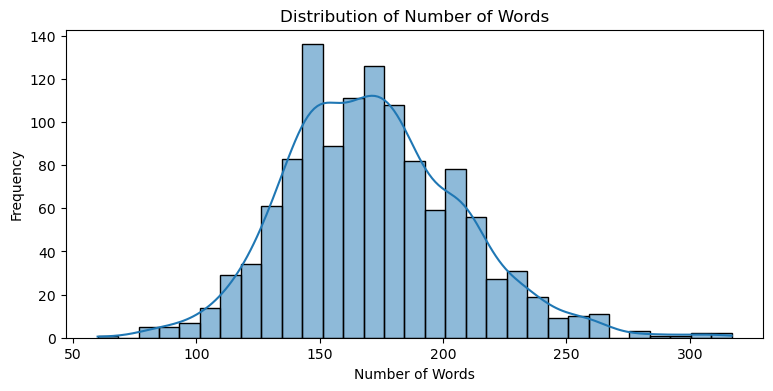

In [71]:

plt.figure(figsize=(9, 4))
fig = sns.histplot(df['num_words'], kde=True)  # Χρήση histplot αντί για distplot που είναι παρωχημένο
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words')
plt.show()

In [72]:

max_len = 320

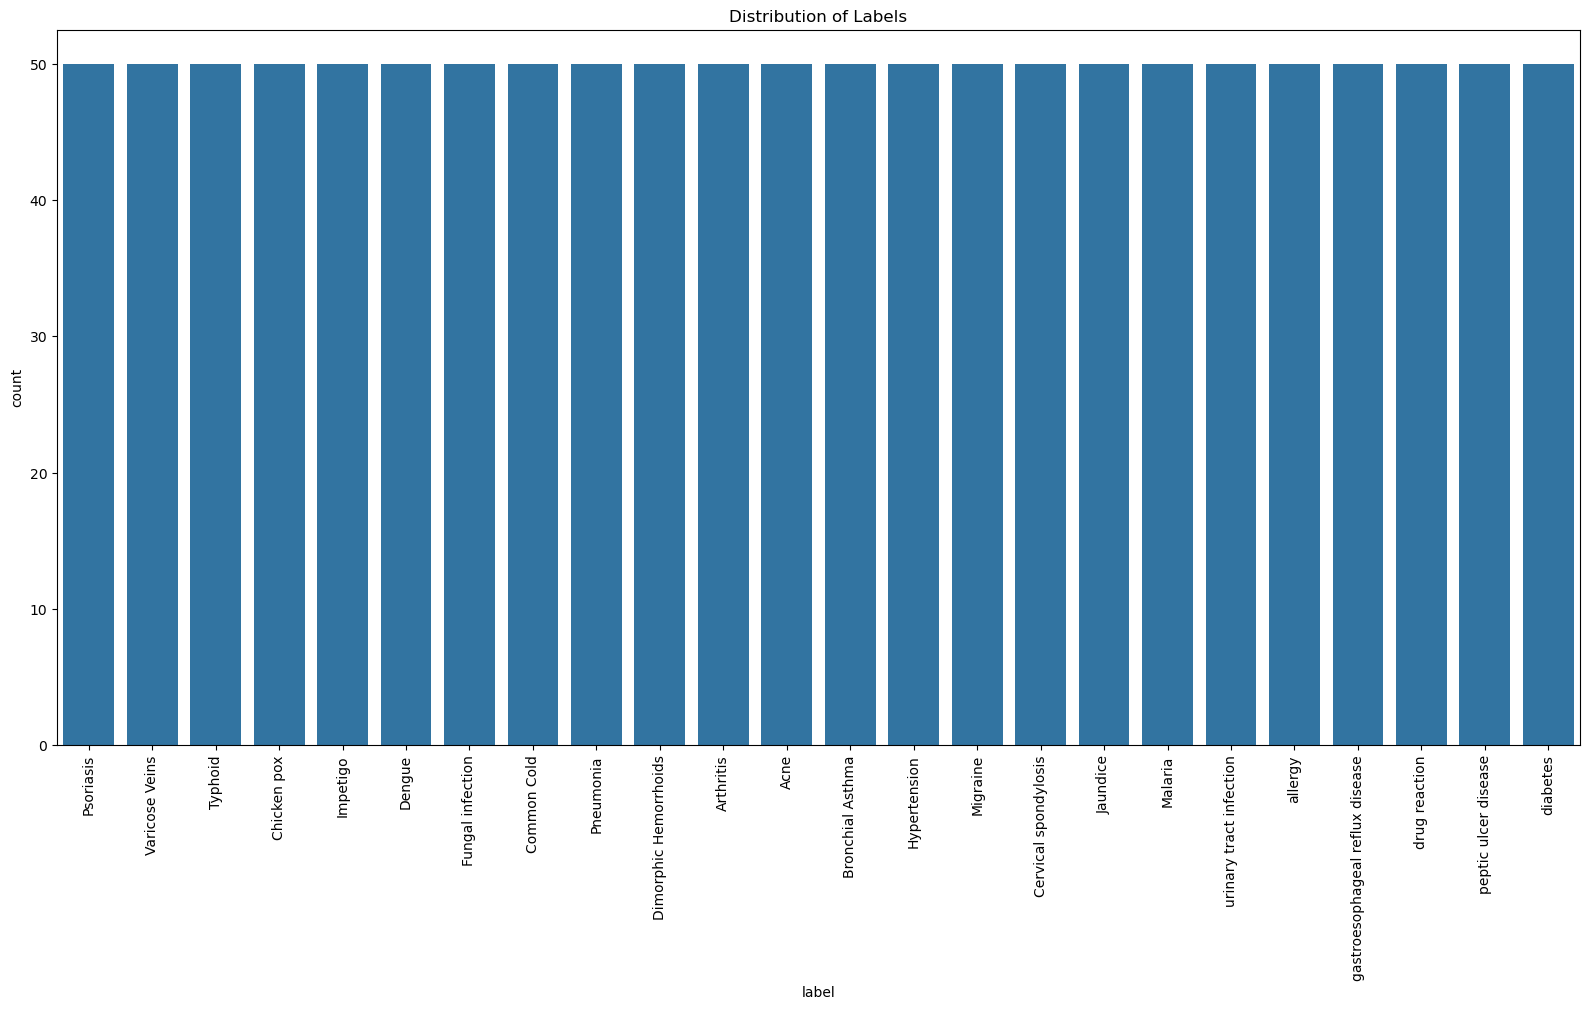

In [73]:

plt.figure(figsize=(16, 10))
fig = sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Distribution of Labels')
plt.show()

In [74]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

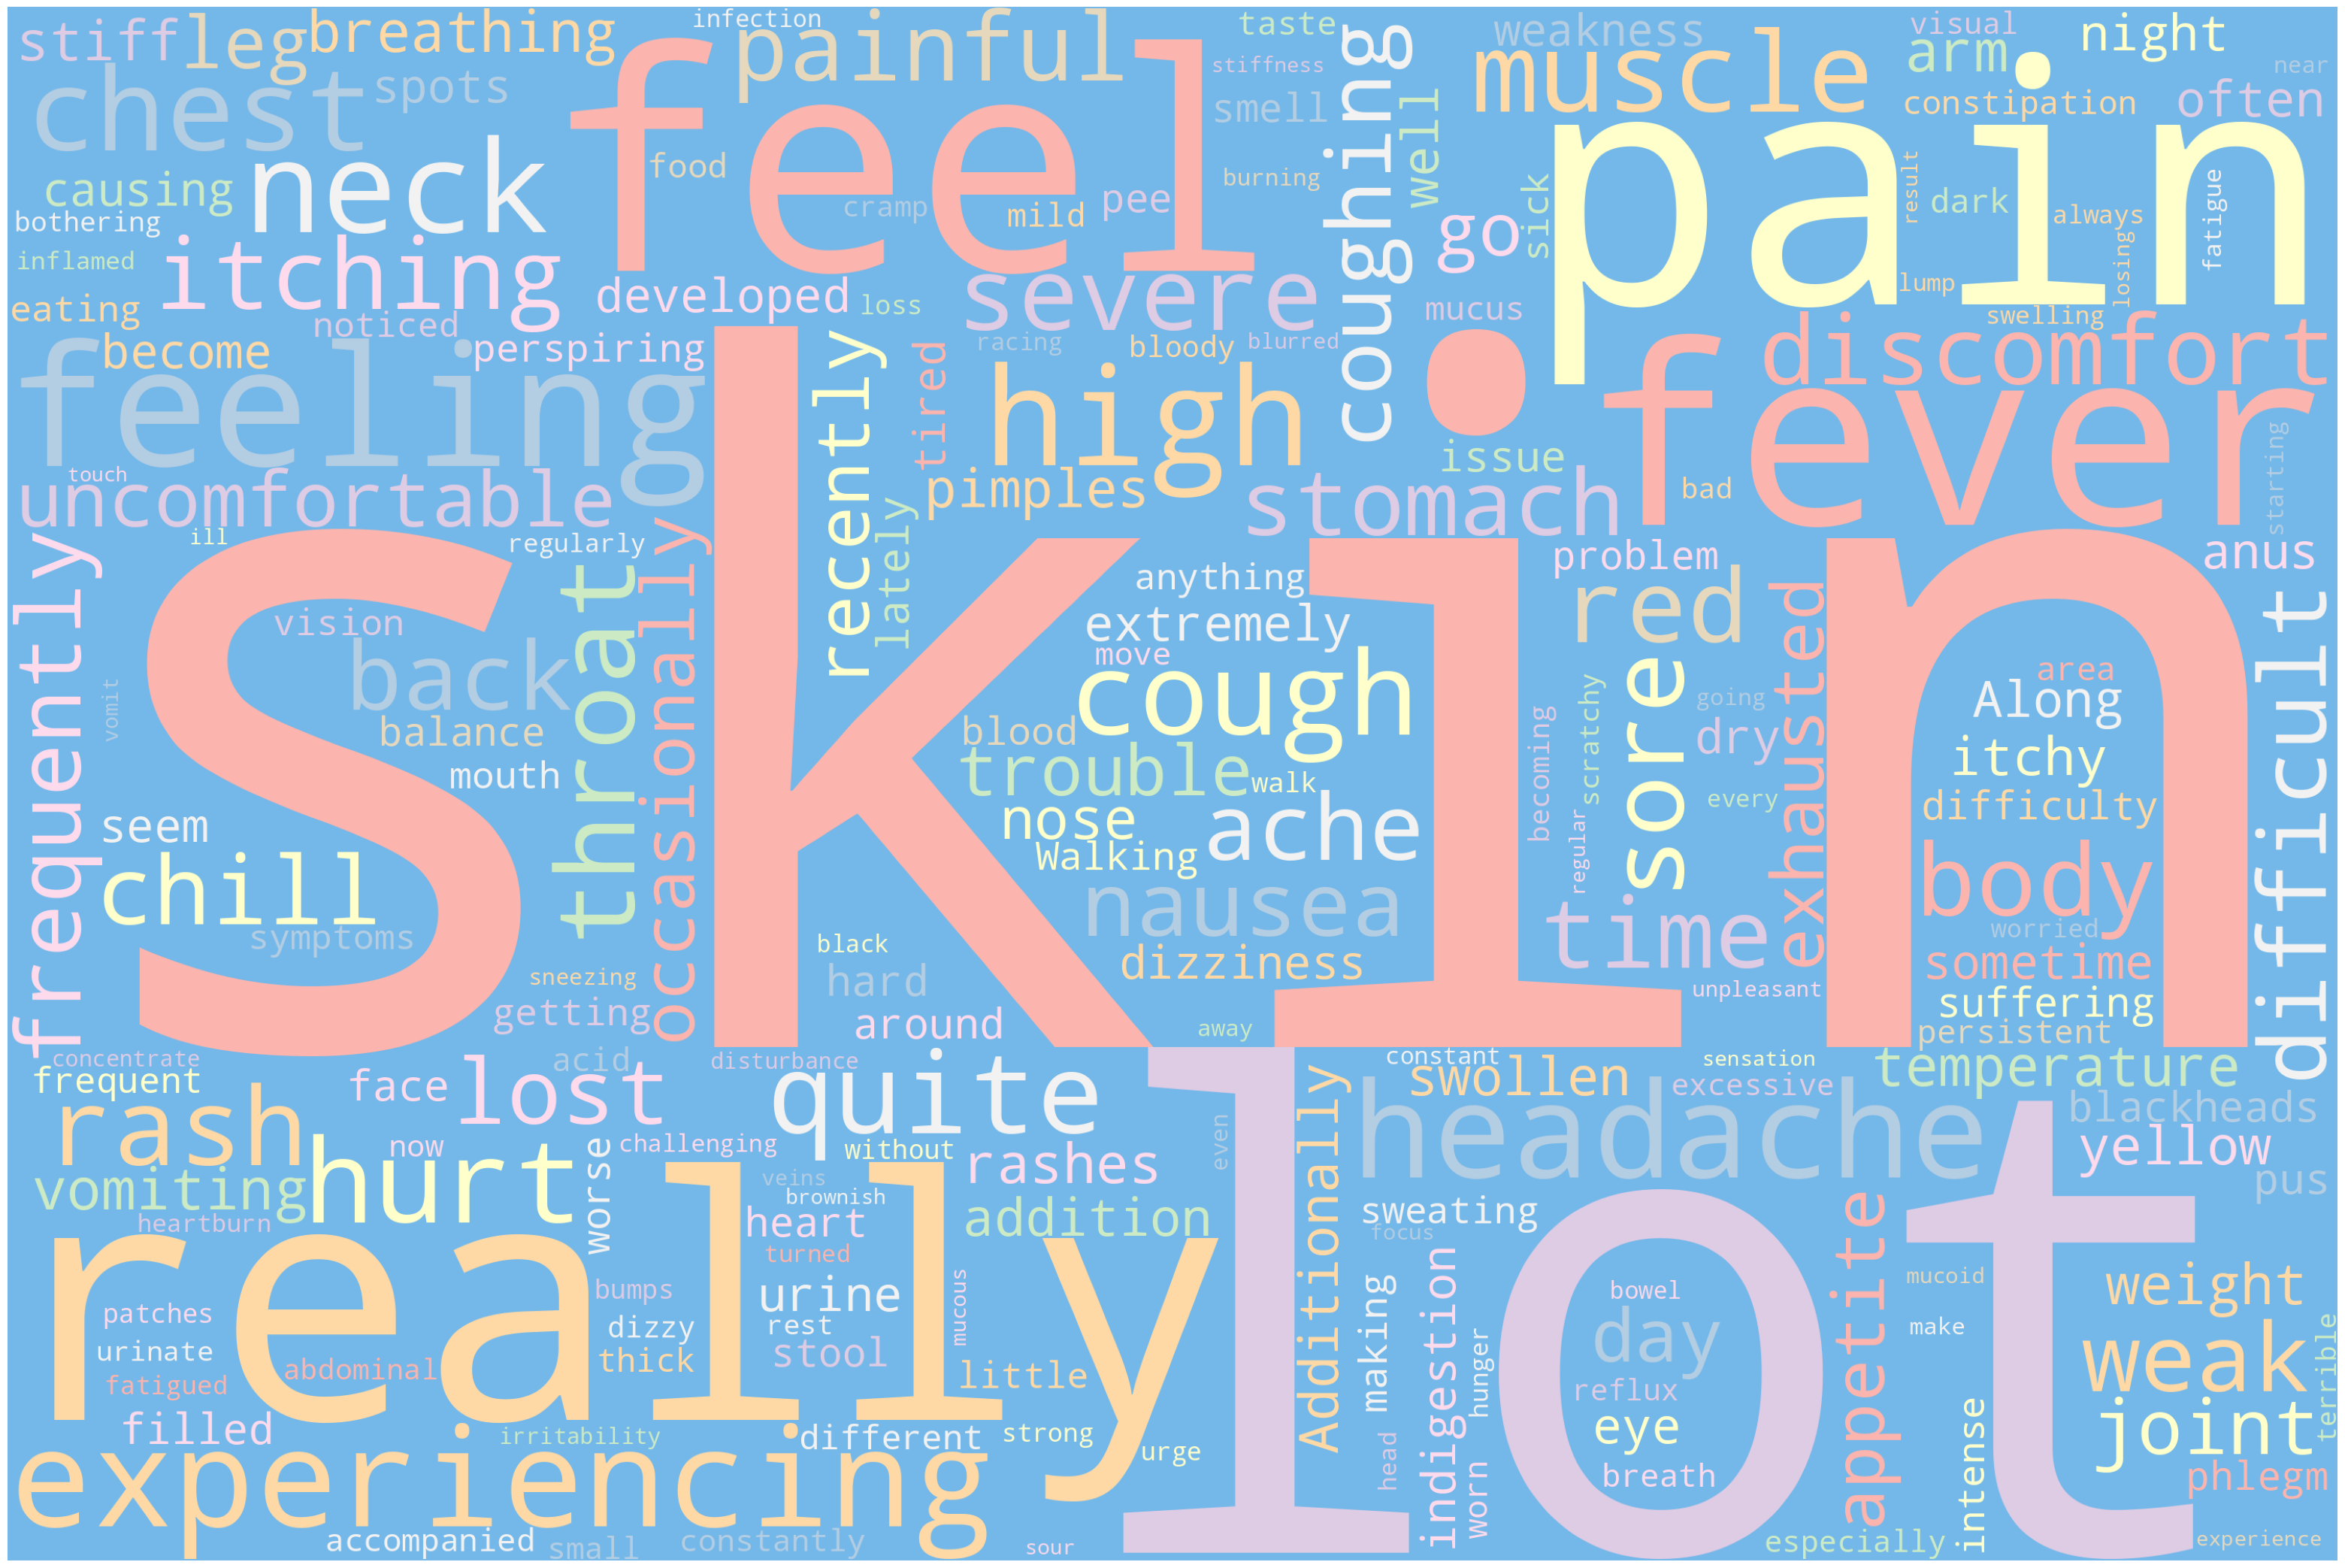

In [75]:
# Ensure 'text' column is converted to a single string
text = " ".join(df['text'].astype(str))

# Generate word cloud with a dark background
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='#73B8E9', colormap='Pastel1', collocations=False).generate(text)

# Plot function (assuming you already have plot_cloud function defined)
plot_cloud(wordcloud)

In [76]:

def clean_text(data, col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=lower)
    return data

In [77]:

preprocessed_df = clean_text(df, 'text')
print(preprocessed_df.head())
print(preprocessed_df.columns)

       label                                               text  num_words
0  Psoriasis  experiencing skin rash arms legs torso past we...        141
1  Psoriasis  my skin peeling especially knees elbows scalp ...        138
2  Psoriasis  experiencing joint pain fingers wrists knees t...        148
3  Psoriasis  there silver dusting skin especially lower bac...        164
4  Psoriasis  my nails small dents pits them often feel infl...        140
Index(['label', 'text', 'num_words'], dtype='object')


In [78]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
preprocessed_df['label_encoded'] = label_encoder.fit_transform(preprocessed_df['label'])


In [80]:

preprocessed_df.head()

,label,text,num_words,label_encoded
0,Psoriasis,experiencing skin rash arms legs torso past we...,141,15
1,Psoriasis,my skin peeling especially knees elbows scalp ...,138,15
2,Psoriasis,experiencing joint pain fingers wrists knees t...,148,15
3,Psoriasis,there silver dusting skin especially lower bac...,164,15
4,Psoriasis,my nails small dents pits them often feel infl...,140,15


In [35]:
label_columns = preprocessed_df['label'].unique().tolist()
print(label_columns)

['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox', 'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold', 'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Jaundice', 'Malaria', 'urinary tract infection', 'allergy', 'gastroesophageal reflux disease', 'drug reaction', 'peptic ulcer disease', 'diabetes']


In [81]:
train_df, test_df = train_test_split(preprocessed_df, test_size=0.3, stratify=preprocessed_df.label, shuffle=True, random_state=101)


In [82]:
import numpy as np
x_train = train_df['text'].to_list()
x_test = test_df['text'].to_list()

In [83]:
y_train = train_df['label_encoded'].values
y_test = test_df['label_encoded'].values

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x_train_emb = vector.fit_transform(x_train)
x_test_emb = vector.transform(x_test)

In [86]:
x_train_emb.T.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
x_test_emb.T.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB()
clf.fit(x_train_emb, y_train)

y_pred = clf.predict(x_test_emb)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        15
           3       0.88      1.00      0.94        15
           4       1.00      1.00      1.00        15
           5       0.94      1.00      0.97        15
           6       0.94      1.00      0.97        15
           7       0.94      1.00      0.97        15
           8       0.94      1.00      0.97        15
           9       1.00      0.87      0.93        15
          10       1.00      1.00      1.00        15
          11       0.88      1.00      0.94        15
          12       0.94      1.00      0.97        15
          13       1.00      0.93      0.97        15
          14       1.00      1.00      1.00        15
          15       1.00      0.93      0.97        15
          16       1.00      0.93      0.97        15
          17       1.00    

In [104]:
def clean_text_for_prediction(text):
    # Apply the cleaning functions step by step on a single text instance
    text = clean_html(text)                # Remove HTML tags
    text = remove_links(text)              # Remove URLs
    text = email_address(text)             # Remove email addresses
    text = remove_digits(text)             # Remove digits
    text = remove_special_characters(text) # Remove special characters
    text = removeStopWords(text)           # Remove stopwords
    text = punct(text)                     # Remove punctuation
    text = non_ascii(text)                 # Remove non-ASCII characters
    text = lower(text)                     # Convert text to lowercase
    
    return text


<h2>Save Model and Predict Disease</h2>

In [123]:
# Save models
import pickle

# Save the label encoder
pickle.dump(label_encoder, open('label_encoder.pkl', "wb"))  # Use "wb" for binary write mode

# Save the vectorizer
pickle.dump(vector, open('Vectorizer.pkl', "wb"))

# Save the classifier model
pickle.dump(clf, open('Disease_model.pkl', "wb"))


In [127]:
vect = pickle.load(open('Vectorizer.pkl','rb'))
model =pickle.load(open('Disease_model.pkl','rb'))
lab_encoder = pickle.load(open('label_encoder.pkl','rb'))

text = input(">>: ")
text =clean_text_for_prediction(text)
emb_text = vect.transform([text])
prediction = model.predict(emb_text)
label = lab_encoder.inverse_transform(prediction)
print(label[0])

>>:  Rectal bleeding, pain or discomfort during bowel movements, itching, or swelling around the anus.


Dimorphic Hemorrhoids


In [132]:
import streamlit as st
import pickle
from dotenv import load_dotenv
from streamlit_chat import message

# Load the machine learning model components
vect = pickle.load(open('Vectorizer.pkl', 'rb'))
model = pickle.load(open('Disease_model.pkl', 'rb'))
lab_encoder = pickle.load(open('label_encoder.pkl', 'rb'))

def clean_text_for_prediction(text):
    # Apply the cleaning functions step by step on a single text instance
    text = clean_html(text)                # Remove HTML tags
    text = remove_links(text)              # Remove URLs
    text = email_address(text)             # Remove email addresses
    text = remove_digits(text)             # Remove digits
    text = remove_special_characters(text) # Remove special characters
    text = removeStopWords(text)           # Remove stopwords
    text = punct(text)                     # Remove punctuation
    text = non_ascii(text)                 # Remove non-ASCII characters
    text = lower(text)                     # Convert text to lowercase
    
    return text

def init():
    st.set_page_config(page_title="Disease Prediction Assistant", page_icon=":pill:")
    st.header("Disease Prediction Based on Symptoms")
    load_dotenv()

def main():
    init()

    # Initialize conversation history
    if "messages" not in st.session_state:
        st.session_state.messages = []

    # Get user input
    user_input = st.chat_input("Describe your symptoms...", key='user_input')

    if user_input:
        st.session_state.messages.append({"content": user_input, "is_user": True})

        # Clean the user input and make a prediction using the ML model
        cleaned_text = clean_text_for_prediction(user_input)
        emb_text = vect.transform([cleaned_text])  # Transform the cleaned text
        prediction = model.predict(emb_text)  # Predict the disease
        label = lab_encoder.inverse_transform(prediction)  # Get the label in text form

        # Generate response with predicted disease
        response = f"The predicted disease based on your symptoms is: {label[0]}"

        # Append response to conversation
        st.session_state.messages.append({"content": response, "is_user": False})

    # Display the conversation
    placeholder = st.empty()
    with placeholder.container():
        messages = st.session_state.get('messages', [])
        for i, msg in enumerate(messages):
            message(msg['content'], is_user=msg['is_user'], key=str(i))

if __name__ == '__main__':
    main()


2024-10-22 03:19:50.182 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 03:19:51.405 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 03:19:51.407 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 03:19:56.175 
  command:

    streamlit run /home/kali/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-10-22 03:19:56.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 03:19:56.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-22 03:19:56.179 Session state d